# Load Functions

## 0. imports

In [7]:
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
import mne

from utils import *
from eeg import compute_eeg_pipeline, test_eeg_pipeline
from ecg_qc import ecg_qc 
from eda_qc import eda_qc
from rsp_qc import *
from mic_qc import *
from lsl_problem import *
from et_qc import *
from webcam_qc import webcam_qc

# subject = "P5029423"
# # xdf_filename = f'/Users/bryan.gonzalez/CUNY_subs/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
# xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'


In [8]:
subject = 'P5070899'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'

# Get Metrics

## 1. EEG

In [9]:
#Compute the eeg vars
eeg_vars = compute_eeg_pipeline(xdf_filename)

Creating RawArray with float64 data, n_channels=128, n_times=299988
    Range : 0 ... 299987 =      0.000 ...   299.997 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=299988
    Range : 0 ... 299987 =      0.000 ...   299.997 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.0s finished


Removed notch frequencies (Hz):
     60.00 :  129 windows
    120.00 :  129 windows
    180.00 :  129 windows
    240.00 :  129 windows
    241.00 :  129 windows
    299.00 :  129 windows
    300.00 :  129 windows
    301.00 :  129 windows
    359.00 :  129 windows
    360.00 :  129 windows
    361.00 :  129 windows
    419.00 :  129 windows
    420.00 :  129 windows
    421.00 :  129 windows
    479.00 :  129 windows
    480.00 :  129 windows
    481.00 :  129 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)

NOTE: pick_types() is a legacy function. Ne

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.0s finished


Executing RANSAC
This may take a while, so be patient...


KeyboardInterrupt: 

## 2. ECG

Effective sampling rate: 500.14558143487386
Average heart rate: 60.41199378159254
Kurtosis signal quality index: 0.11842223696817822
Power spectrum distribution signal quality index: 0.9600878083282905
Relative power in baseline signal quality index: 1.9885655104482636
Signal to Noise Ratio: 3.6311300980508543


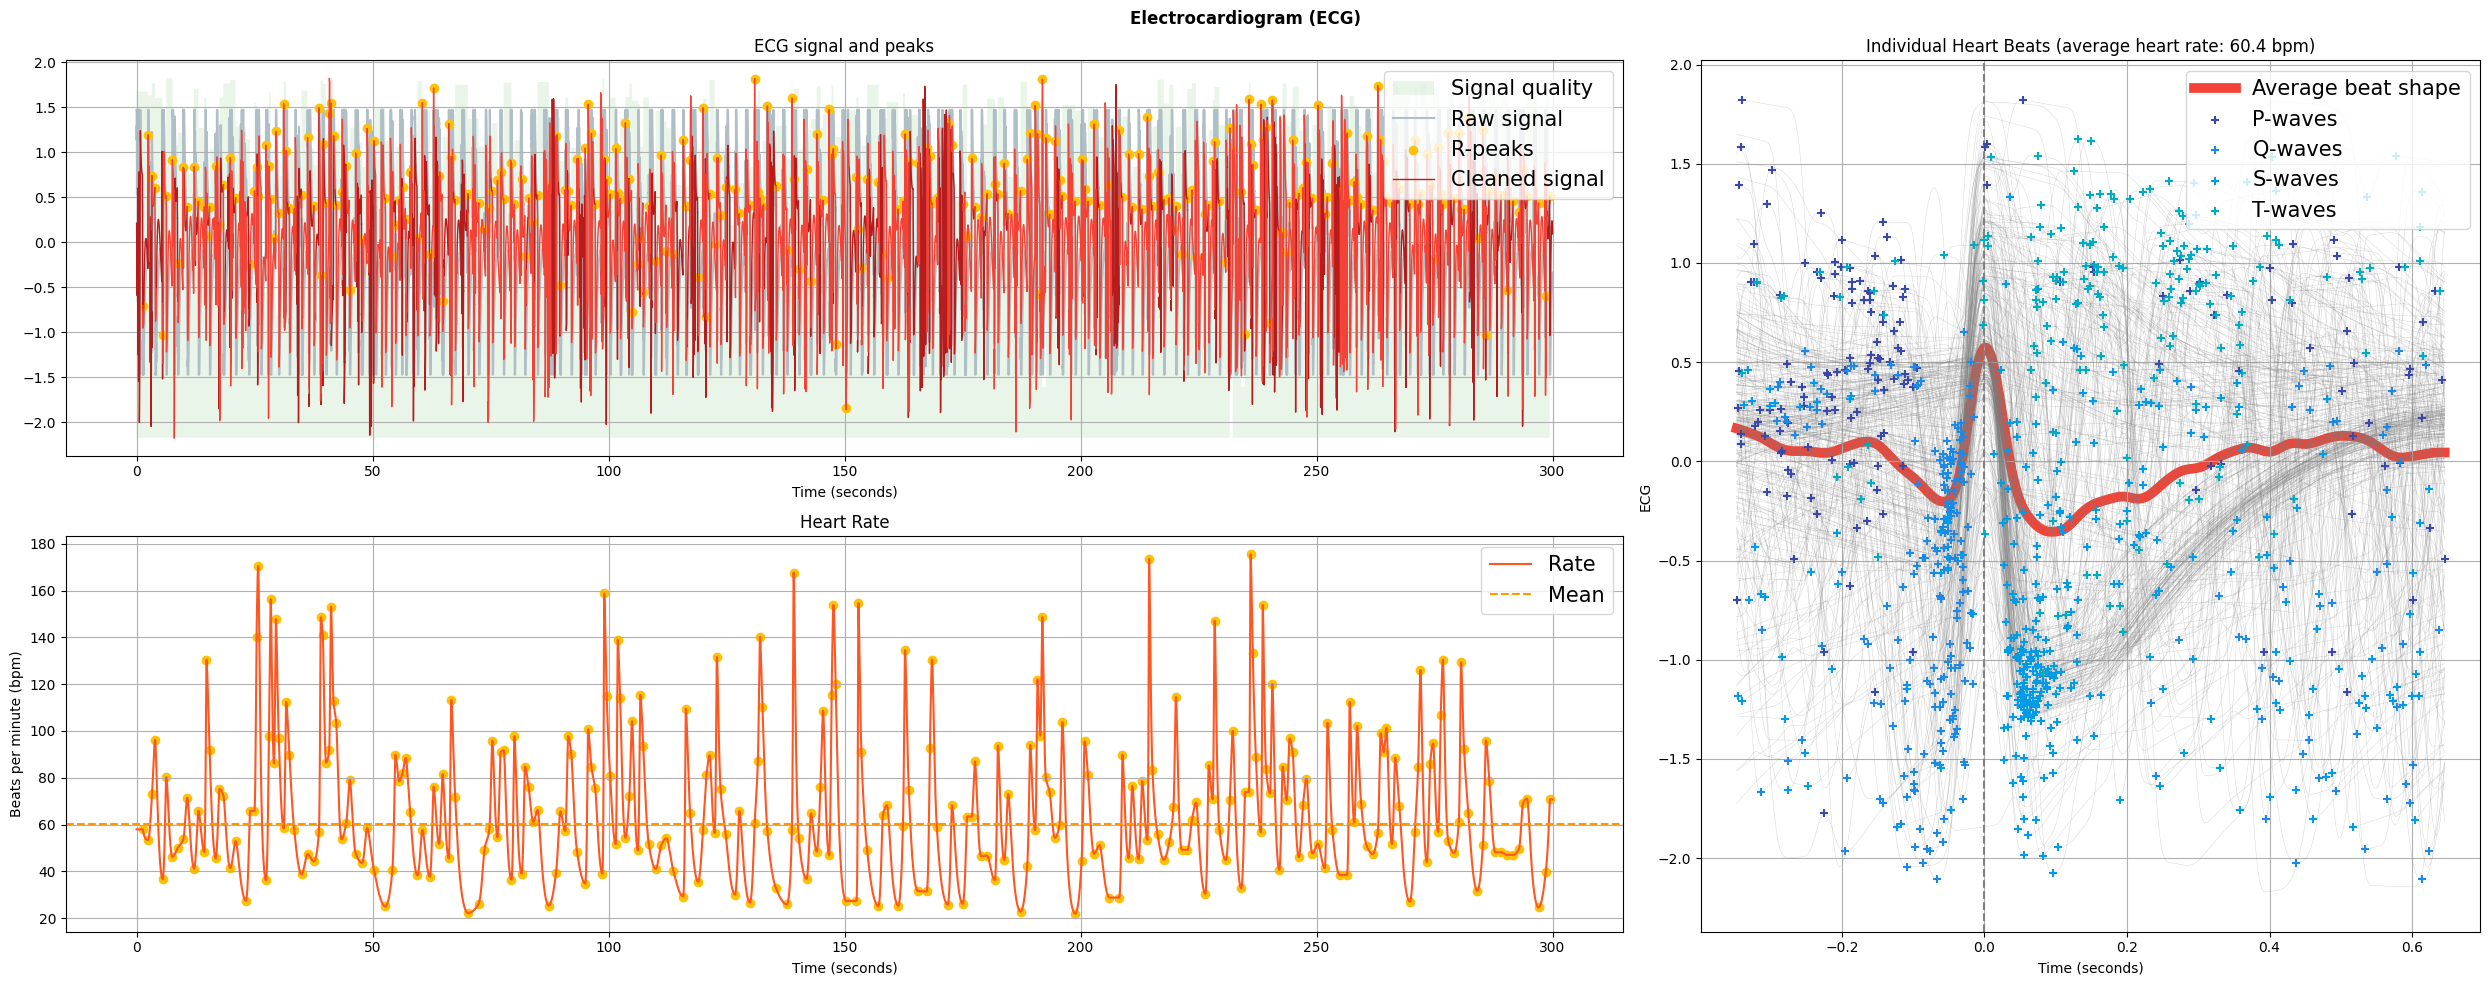

In [ ]:
[ecg_vars, ecg_plt] = ecg_qc(xdf_filename)


## 3. EDA

Effective sampling rate: 500.146 Hz
Signal Integrity Check: 100.000 %
Average Skin Conductance Level: 0.280 mS
Skin Conductance Level Standard deviation: 0.015 mS
Skin Conductance Level Coefficient of Variation: 5.433 %
Average Amplitude of Skin Conductance Response: 0.001 mS
Skin Conductance Response Validity: 0.000 %
Signal to Noise Ratio: 23.218 dB


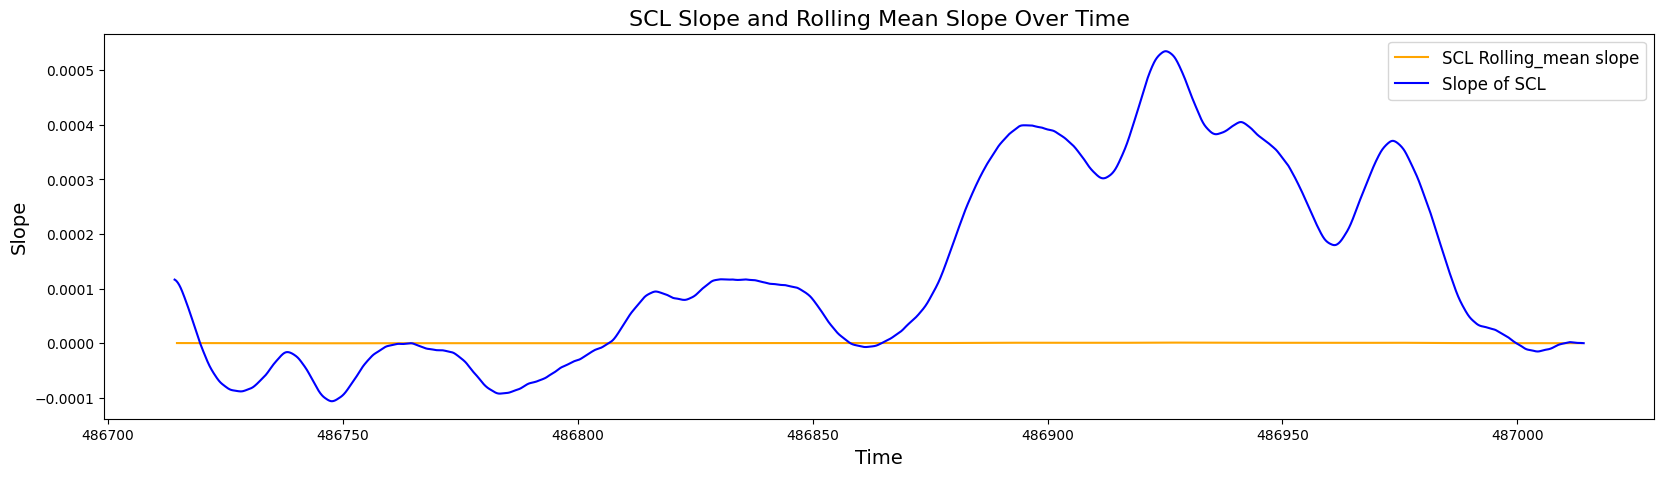

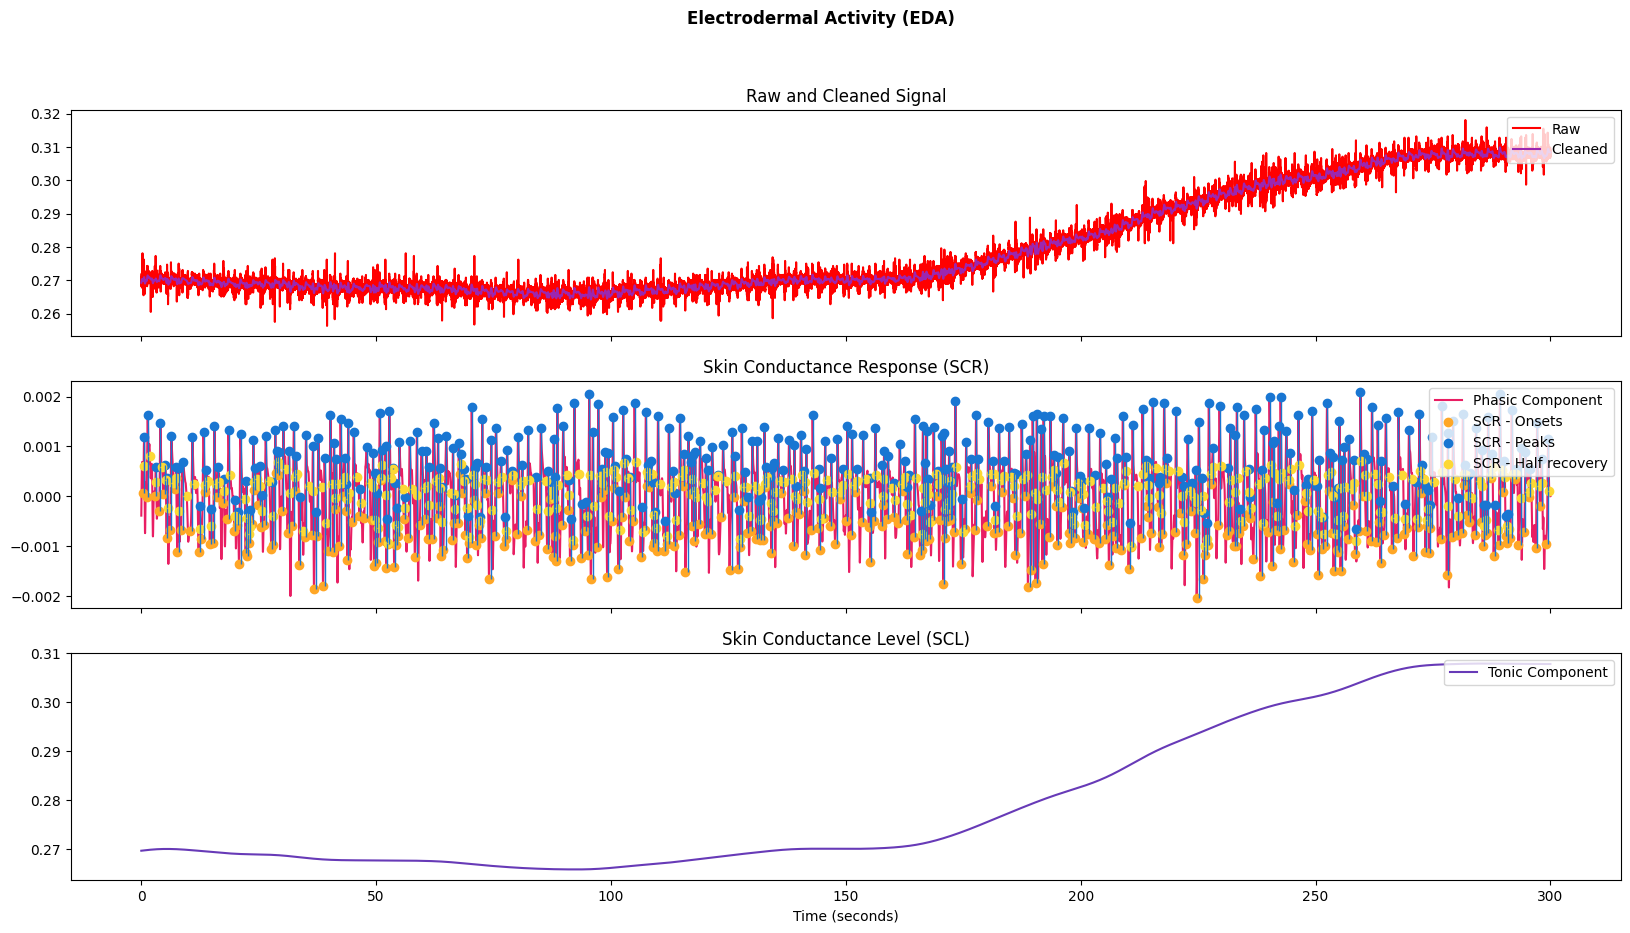

In [ ]:
[eda_vars, eda_plt1, eda_plt2] = eda_qc(xdf_filename)

In [ ]:
# Sample data for the table
data = [
    ["variable", "value"],
    ["bad channels before", str(eeg_vars["bad_channels_before"])],
    ["interpolated channels", str(eeg_vars["interpolated_channels"])],
    ["bad channels after", str(eeg_vars["bad_channels_after"])],
   ["percentage of good data", str(eeg_vars["percent_good"])],
]

## 4. RSP

In [ ]:
rsp_vars = rsp_qc(xdf_filename)

Effective sampling rate: 500.1456
Signal to Noise Ratio: 13.9997
Breath amplitude mean: 0.4896
Breath amplitude std: 0.2103
Breath amplitude range: 0.1243 - 1.5212
Respiration rate mean: 21.9862
Respiration rate std: 2.7932
Respiration rate range: 11.4035 - 27.3694
Peak to peak interval mean: 2.9005
Peak to peak interval std: 1.1108
Peak to peak interval range: 0.7278 - 13.4341
Baseline drift: 0.0382
Autocorrelation at typical breath cycle: 0.0425


In [ ]:
rsp_vars

{'sampling_rate': np.float64(500.14558143487386),
 'rsp_snr': np.float64(13.999734150276005),
 'breath_amplitude_mean': np.float64(0.48957396587077456),
 'breath_amplitude_std': np.float64(0.21026061230662346),
 'breath_amplitude_range': '0.1243 - 1.5212',
 'rsp_rate_mean': np.float64(21.98622000079768),
 'rsp_rate_std': np.float64(2.793200964346426),
 'rsp_rate_range': '11.4035 - 27.3694',
 'ptp_mean': np.float64(2.9005163753015),
 'ptp_std': np.float64(1.110785581094312),
 'ptp_range': '0.7278 - 13.4341',
 'baseline_drift': np.float64(0.038244615954413995),
 'autocorrelation': np.float64(0.04247338019795156)}

## 5. Mic

In [ ]:
mic_vars = mic_qc(xdf_filename)

Effective sampling rate: 44099.2296
Difference between .wav file and lsl timestamps durations: 0.0330
number of NaN's: 0 
percent of NaN's: 0.0000%
mic samples first quartile: -26.0 
mic samples third quartile: 26.0
mic samples standard deviation: 134.6249
mic samples min: -8675 
mic samples max: 7355


## 6. Webcam

In [ ]:
webcam_vars = webcam_qc(xdf_filename==xdf_filename,
                video_file=video_filename, task='RestingState')

NameError: name 'video_filename' is not defined

## 7. ET

In [ ]:
et_vars = et_qc(xdf_filename)

Effective sampling rate: 119.9957
Flag: all coordinates have the same % validity within each measure (LR, gaze point/origin/diameter): True
Flag: % of NaNs is the same between coordinate systems (UCS and TBCS (gaze origin) and between UCS and display area (gaze point)): True
Mean difference in percent valid data between right and left eyes: 4.8127%
Percent of data with gaze point differences of over 0.2 mm: 3.7292%


## Stream Durations 

### functions are in utils.py (but should be called in the report)

In [ ]:
duration_vars = {"Durations of each modality + comparison to expected duration:": get_durations(ExperimentPart='Experiment', xdf_path=xdf_filename)}

mic is shorter than expected for Experiment by 364.1519 seconds

Experiment DataFrame


In [ ]:
get_durations('RestingState', xdf_filename)


RestingState DataFrame


,stream,duration,mm:ss,percent
3,cam,299.9479,0:05:00,99.9831%
0,et,299.9940,0:05:00,99.9984%
1,ps,299.9966,0:05:00,99.9993%
4,eeg,299.9974,0:05:00,99.9996%
5,expected,299.9987,0:05:00,100.0000%


In [ ]:
# i wont run these but they are here for reference
# get_durations('CampFriend', xdf_filename)
# get_durations('SocialTask', xdf_filename)

In [ ]:
whole_durations(xdf_filename)

mic is shorter than expected by 398.0832 seconds


,stream,duration,mm:ss,percent
2,mic,1849.1325,0:30:49,82.2855%
3,cam,2230.0952,0:37:10,99.2381%
0,et,2230.1208,0:37:10,99.2393%
4,eeg,2247.1168,0:37:27,99.9956%
1,ps,2247.2157,0:37:27,100.0000%


## LSL Problem

In [ ]:
lsl_vars = lsl_problem(xdf_filename)

no data loss detected for P5070899 for entire experiment
no data loss detected for P5070899 before social task


In [ ]:
lsl_vars

{'percent_loss': 'no data loss detected for P5070899 for entire experiment',
 'loss_before_social_task': 'no data loss detected for P5070899 before social task'}

# Report

## 1. Set up Document

In [4]:


# Set up the document
doc = SimpleDocTemplate("example_report.pdf", pagesize=LETTER)
styles = getSampleStyleSheet()
story = []

# Add a title
title = Paragraph(f"Subject Report: {subject}", styles["Title"])
story.append(title)
story.append(Spacer(1, 20))

# Add a paragraph
text = f"""
Collection Date: {get_collection_date(xdf_filename)} 
"""
paragraph = Paragraph(text, styles["BodyText"])
story.append(paragraph)
story.append(Spacer(1, 20))




In [5]:
# Add a subtitle
subtitle = Paragraph(f"EEG", styles["Heading2"], )
story.append(subtitle)
story.append(Spacer(1, 5))

# Add a paragraph
text = f"""
Data preprocessed by performing <b>line noise removal</b>, <b>robust referencing</b>, and <b>bad channel detection/interpolation</b> using PyPrep pipeline. First, the pipeline applies a notch filter at 60 Hz and its harmonics to remove power line noise. Then, it performs <b>robust average referencing</b>, where it detects bad channels, interpolates them using surrounding signals, and computes a median-based reference across EEG channels. This ensures a stable reference even in the presence of noisy electrodes. The final output is a cleaned EEG dataset with a consistent reference, ready for further analysis.
"""

paragraph = Paragraph(text, styles["BodyText"], )
story.append(paragraph)
story.append(Spacer(1, 20))

## Computer the EEG variables (will take time)

In [6]:
# add an image
from reportlab.lib.units import inch
from reportlab.platypus import Image
image = Image("/Users/camilla.strauss/Desktop/MOBI_QC/src/MOBI_QC/report_images/P5287460_rsp_peaktopeak.png", 7*inch, 3*inch)
image.hAlign = 'CENTER'
story.append(image)

In [7]:
story.append(Spacer(1, 20))

In [ ]:



# Define the table style to make all borders white
style = TableStyle([
    ('GRID', (0,0), (-1,-1), 1, colors.white),  # All grid lines white
    ('BOX', (0,0), (-1,-1), 1, colors.white),   # Outer box white
    ('INNERGRID', (0,0), (-1,-1), 1, colors.white)  # Inner grid white
])
# Create the table
# table = Table(data, style=style)
# Apply style
#table.setStyle(style)
# story.append(table)
#story.append(Spacer(1, 20))

NameError: name 'data' is not defined

In [8]:
# Build the PDF
doc.build(story)

In [ ]:
table

# I try from scratch

In [ ]:
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
import os

# Modalities and corresponding data
metric_names = ["EEG", "ECG", "EDA", "RSP", "MIC", "ET", "Stream Durations", "LSL"]
metrics_list = [eeg_vars, ecg_vars, eda_vars, rsp_vars, mic_vars, et_vars, duration_vars, lsl_vars]

# PDF structure
pdf_path = "output_report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
elements = []
styles = getSampleStyleSheet()

# Define subtitle style if not already done
subtitle_style = ParagraphStyle(
    name="Subtitle",
    parent=styles["Heading2"],
    fontSize=14,
    leading=16,
    textColor="gray",
    spaceAfter=12,
    alignment=1  # Centered
)


elements.append(Paragraph(f"Subject Report: {subject}", styles["Title"]))
elements.append(Paragraph(f"Collection Date: {get_collection_date(xdf_filename)}", subtitle_style))
elements.append(Spacer(1, 12))

# Format each metrics dict
for name, metrics in zip(metric_names, metrics_list):
    elements.append(Paragraph(name, styles["Heading2"]))
    for k, v in metrics.items():
        if isinstance(v, pd.DataFrame):
            data = [v.columns.tolist()] + v.values.tolist()  # Include headers
            table = Table(data, repeatRows=1)
            table.hAlign = 'LEFT'

            table.setStyle(TableStyle([
                ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
                ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
                ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
                ('FONTSIZE', (0, 0), (-1, -1), 10),
                ('ALIGN', (0, 0), (-1, -1), 'LEFT'),
            ]))

            elements.append(table)
            elements.append(Spacer(1, 12))
        else:
            text = f"<b>{k}:</b> {v:.4f}" if isinstance(v, float) else f"<b>{k}:</b> {v}"
        elements.append(Paragraph(text, styles["Normal"]))
    elements.append(Spacer(1, 12))
    # images
    folder = "report_images"
    image_keyword = name.lower()
    if os.path.exists(folder):
        for fname in sorted(os.listdir(folder)):
            if image_keyword in fname.lower() and subject in fname:
                image_path = os.path.join(folder, fname)
                img = Image(image_path, width=400, height=200)  # Adjust size as needed
                elements.append(img)


doc.build(elements)
print(f'PDF created: {pdf_path}')

PDF created: output_report.pdf


In [11]:
from IPython.display import FileLink

FileLink("output_report.pdf")

/Users/camilla.strauss/Desktop/MOBI_QC/src/MOBI_QC/output_report.pdf